In [1]:
import pandas as pd

## Load Dataset

In [7]:
# 판다스의 read_csv로 train.csv 파일을 읽어옵니다.
# 여기서 datetime은 특별히 날짜로 해석하기 위해 parse_dates 옵션에 넣어줍니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv", parse_dates=["datetime"])

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.
# 이후 이 데이터를 test라는 이름의 변수에 저장합니다.
test = pd.read_csv("test.csv", parse_dates=["datetime"])

# 마찬가지로 행렬(row, column) 사이즈를 출력하고
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력합니다.
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

In [9]:
# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 datetime-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능입니다.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냅니다.
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [10]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [11]:
# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성합니다.
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# dayofweek 컬럼도 train 데이터와 동일하게 생성합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [12]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


## Explore

In [13]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

## datetime

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


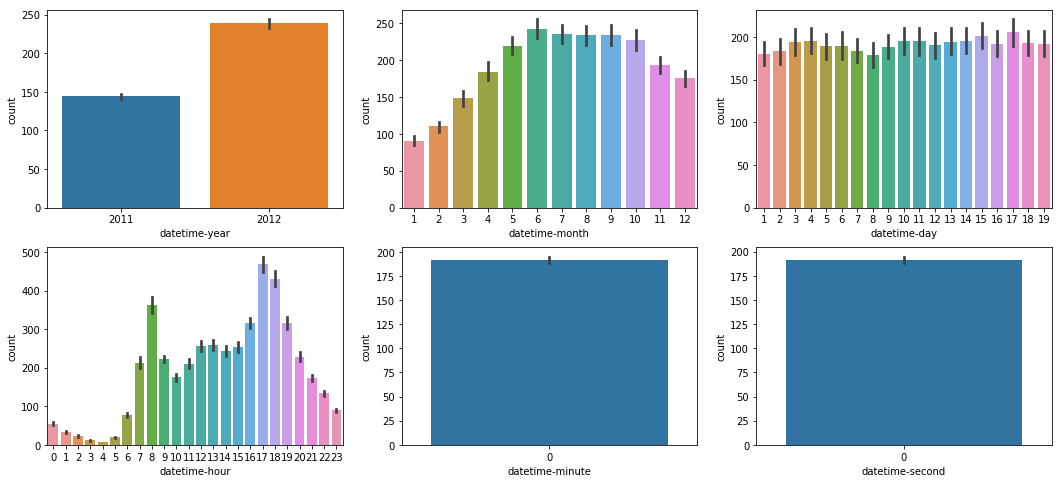

In [15]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [16]:
# datetime-year와 datetime-month의 형태를 변환합니다.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환합니다.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력합니다.
train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


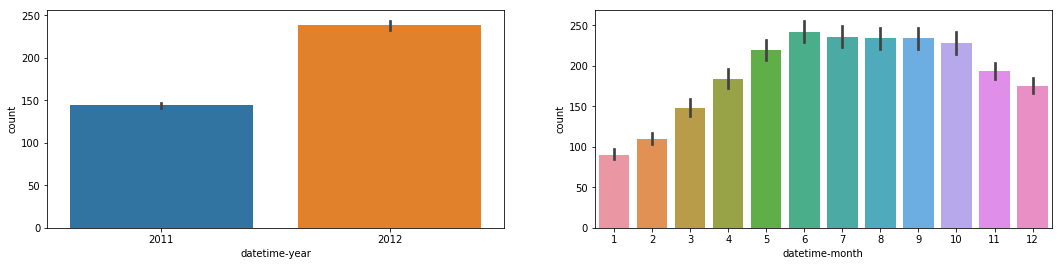

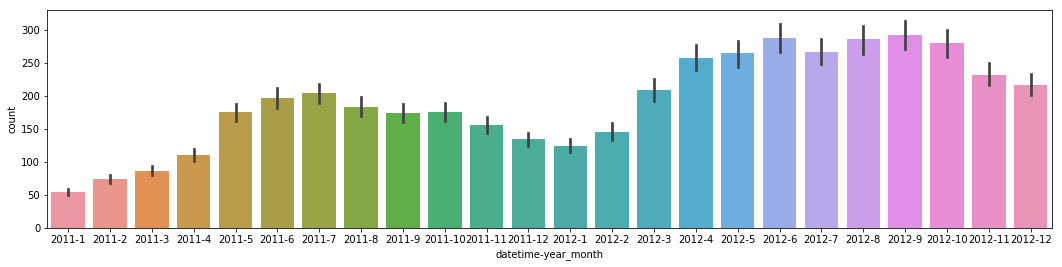

In [17]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x2로 총 2개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# 다시 한 번 matplotlib의 subplots를 사용합니다.
# 이번에는 1x1로 1개의 시각화만을 출력합니다.
figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

## datetime-hour

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


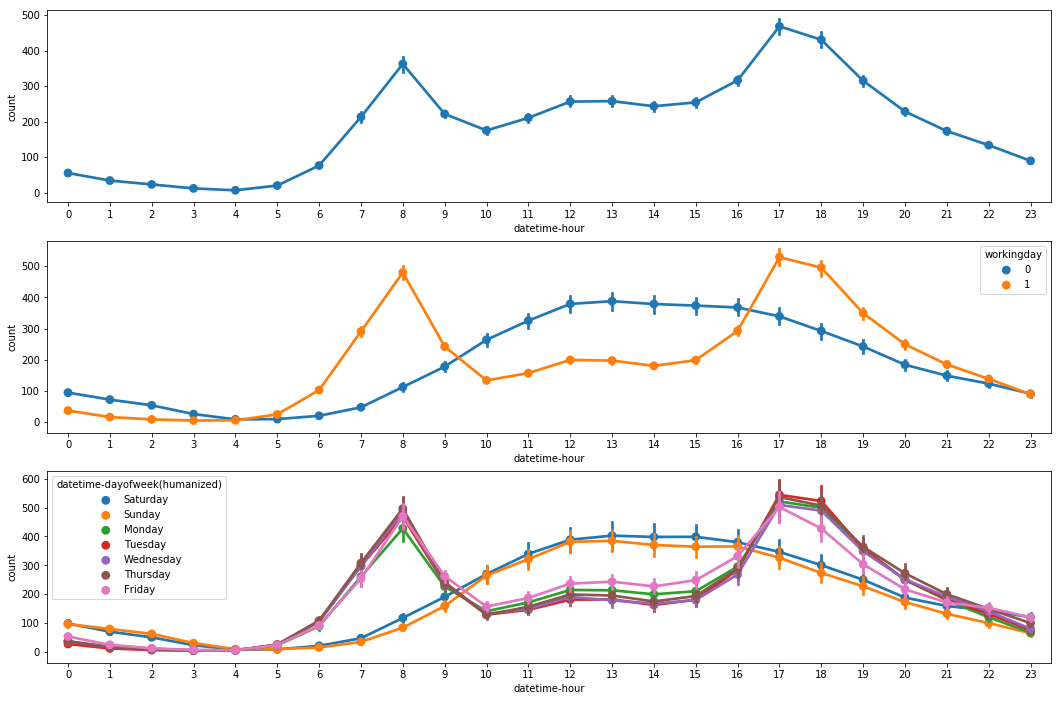

In [35]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


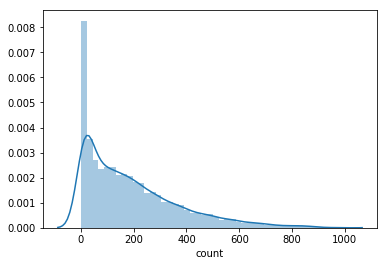

In [36]:
sns.distplot(train["count"])

In [39]:
# sns.distplot(np.log(train["count"])+1

In [19]:
# 총 11개의 컬럼을 feature를 지정합니다.
# 이 11개의 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [20]:
# 자전거 대여량(count)을 label로 지정합니다.
# count라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "count"
label_name

'count'

In [21]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [22]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [23]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## Use Random Forest

In [ ]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor


# < Hyperparameter 정리 >

# n_estimators : 트리 (모형)의 개수 - 크면 클수록 좋으나 어느 순간 성능의 정체가 생깁니다. 따라서 속도와 연산에 영향을 미치므로 어느정도까지만 크게 설정해주면 됩니다

# max_depth : 트리의 깊이 - 너무 크거나 혹은 너무 작으면 좋지 않습니다.

# max_features : 각 트리가 사용할 수 있는 특성의 비율 - 예를 들어 0.7이라면 한 개의 트리는 70%의 특성만 사용할 수 있습니다.
model = RandomForestRegressor(n_estimators=3000,
                                                          max_depth = 83,
                                                          max_features = 0.851358,
                                                          random_state=37)
model




# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 2) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=37)
# model

## Gradient Boosting Machine

## Evaluate

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 20)

print(y_predict.shape)
y_predict

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_train, y_predict)
score = np.sqrt(score)

# "Score = {:.5f}".format(score)
f"Score = {score:.5f}"

In [ ]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_train, y_predict)

score

## Fit

In [ ]:
# RandomForestRegressor를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

## Predict

In [ ]:
# fit이 끝났으면, predict라는 기능을 사용하여 자전거 대여량(count)을 예측합니다.
# predict의 실행이 끝나면 test 데이터의 자전거 대여량(count)을 반환하며,
# 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수를 출력합니다.
predictions

## Submit

In [31]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [32]:
# 제출 포멧(submission)의 자전거 대여량(count) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 6493개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["count"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [34]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("random-forest.csv", index=False)